In [ ]:
# prompt: connect google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


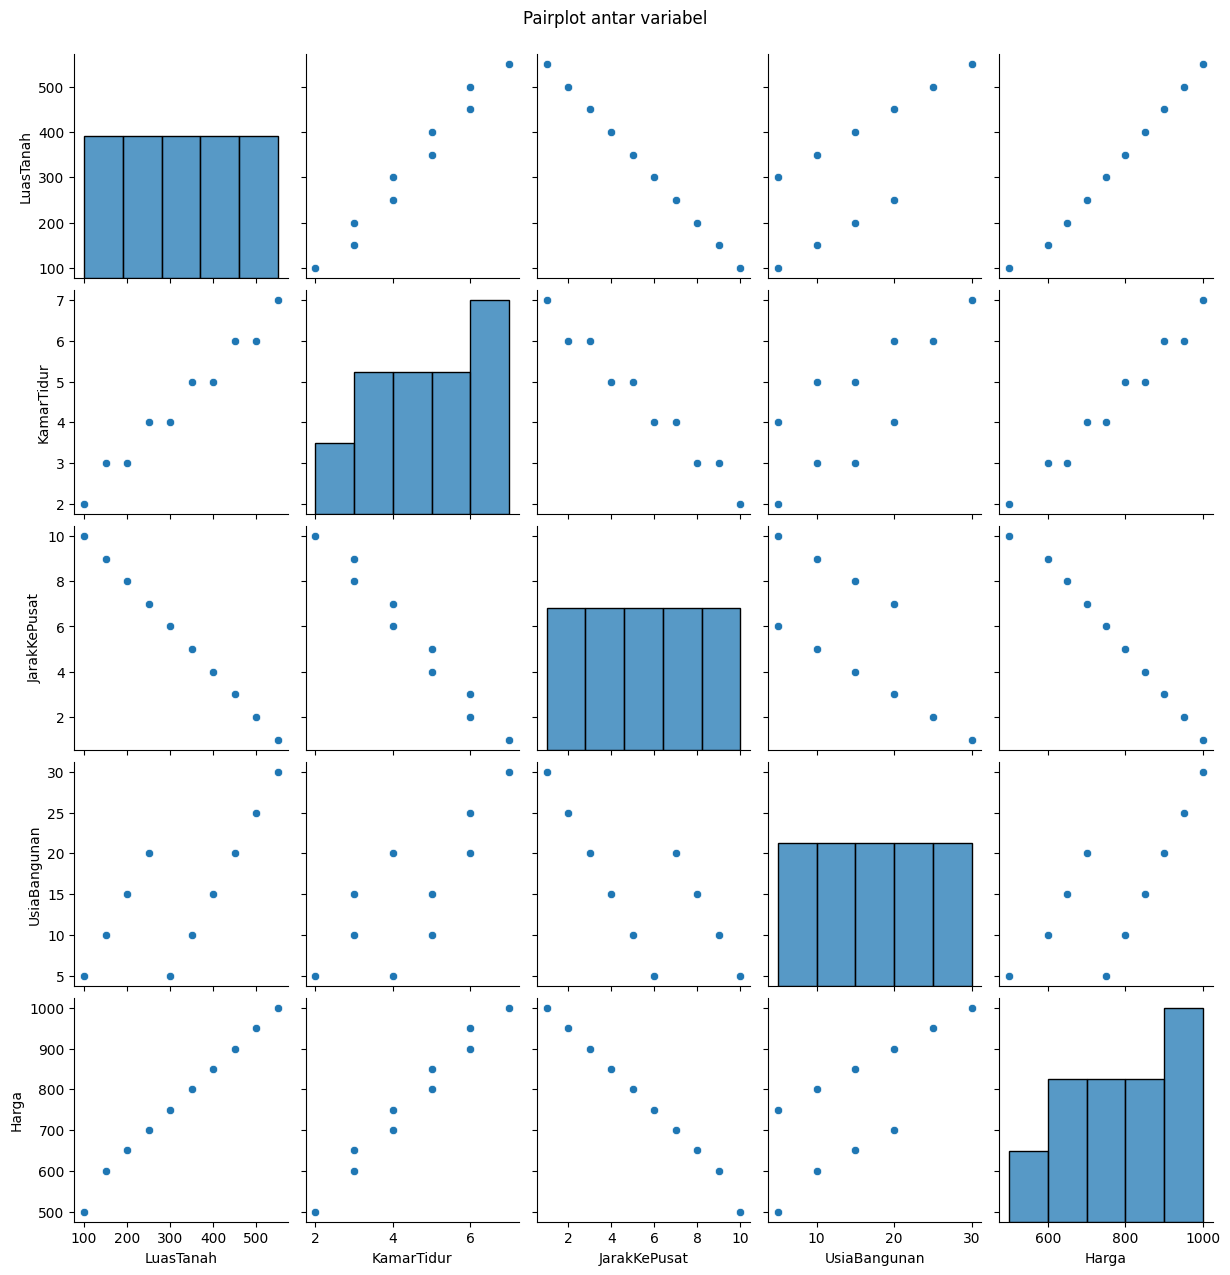

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

data = pd.DataFrame({
    'LuasTanah'     : [100, 150, 200, 250, 300, 350, 400, 450, 500, 550],
    'KamarTidur'    :[2,3,3,4,4,5,5,6,6,7],
    'JarakKePusat'  :[10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    'UsiaBangunan'  :[5, 10, 15, 20, 5, 10, 15, 20, 25, 30,],
    'Harga' : [500, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
})

sns.pairplot(data)
plt.suptitle("Pairplot antar variabel", y=1.02)
plt.show()

In [ ]:
X = data[['LuasTanah', 'KamarTidur', 'JarakKePusat', 'UsiaBangunan']]
y = data['Harga']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

In [ ]:
model = sm.OLS(y_train, X_train_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Harga   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     133.9
Date:                Mon, 02 Jun 2025   Prob (F-statistic):            0.00108
Time:                        03:50:24   Log-Likelihood:                -28.080
No. Observations:                   7   AIC:                             64.16
Df Residuals:                       3   BIC:                             63.94
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.9557      0.334      8.847   

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


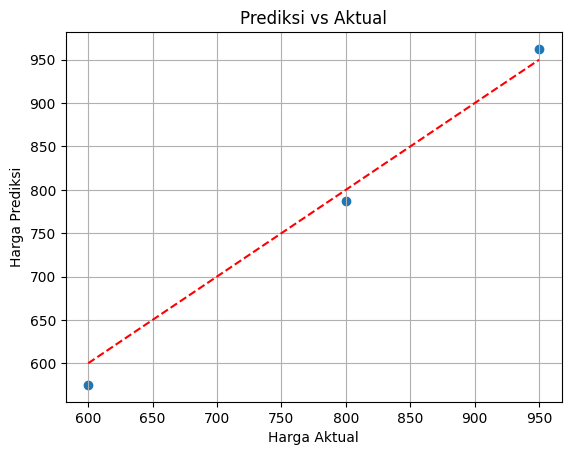

In [ ]:
y_pred = model.predict(X_test_const)

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],'r--')
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.title('Prediksi vs Aktual')
plt.grid(True)
plt.show()

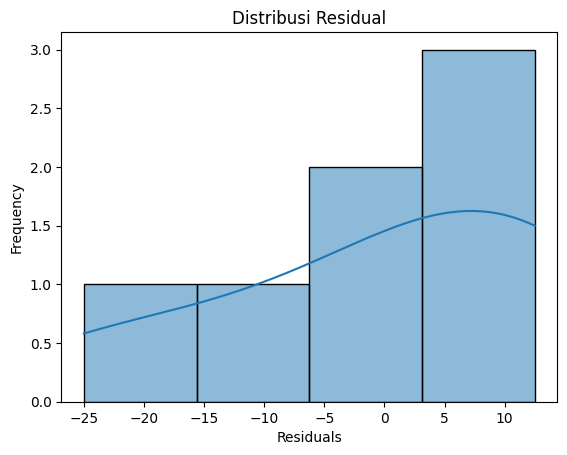

In [ ]:
residuals = model.resid
sns.histplot(residuals, kde=True)
plt.title("Distribusi Residual")
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


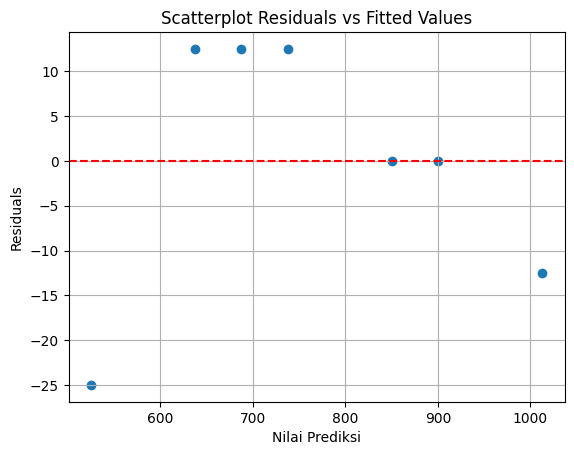

In [ ]:
residuals = model.resid
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Scatterplot Residuals vs Fitted Values")
plt.xlabel("Nilai Prediksi")
plt.ylabel("Residuals")
plt.grid(True)

In [ ]:
vif = pd.DataFrame()
vif["feature"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

        feature         VIF
0     LuasTanah  317.042390
1    KamarTidur   40.500000
2  JarakKePusat    7.764612
3  UsiaBangunan    2.593750


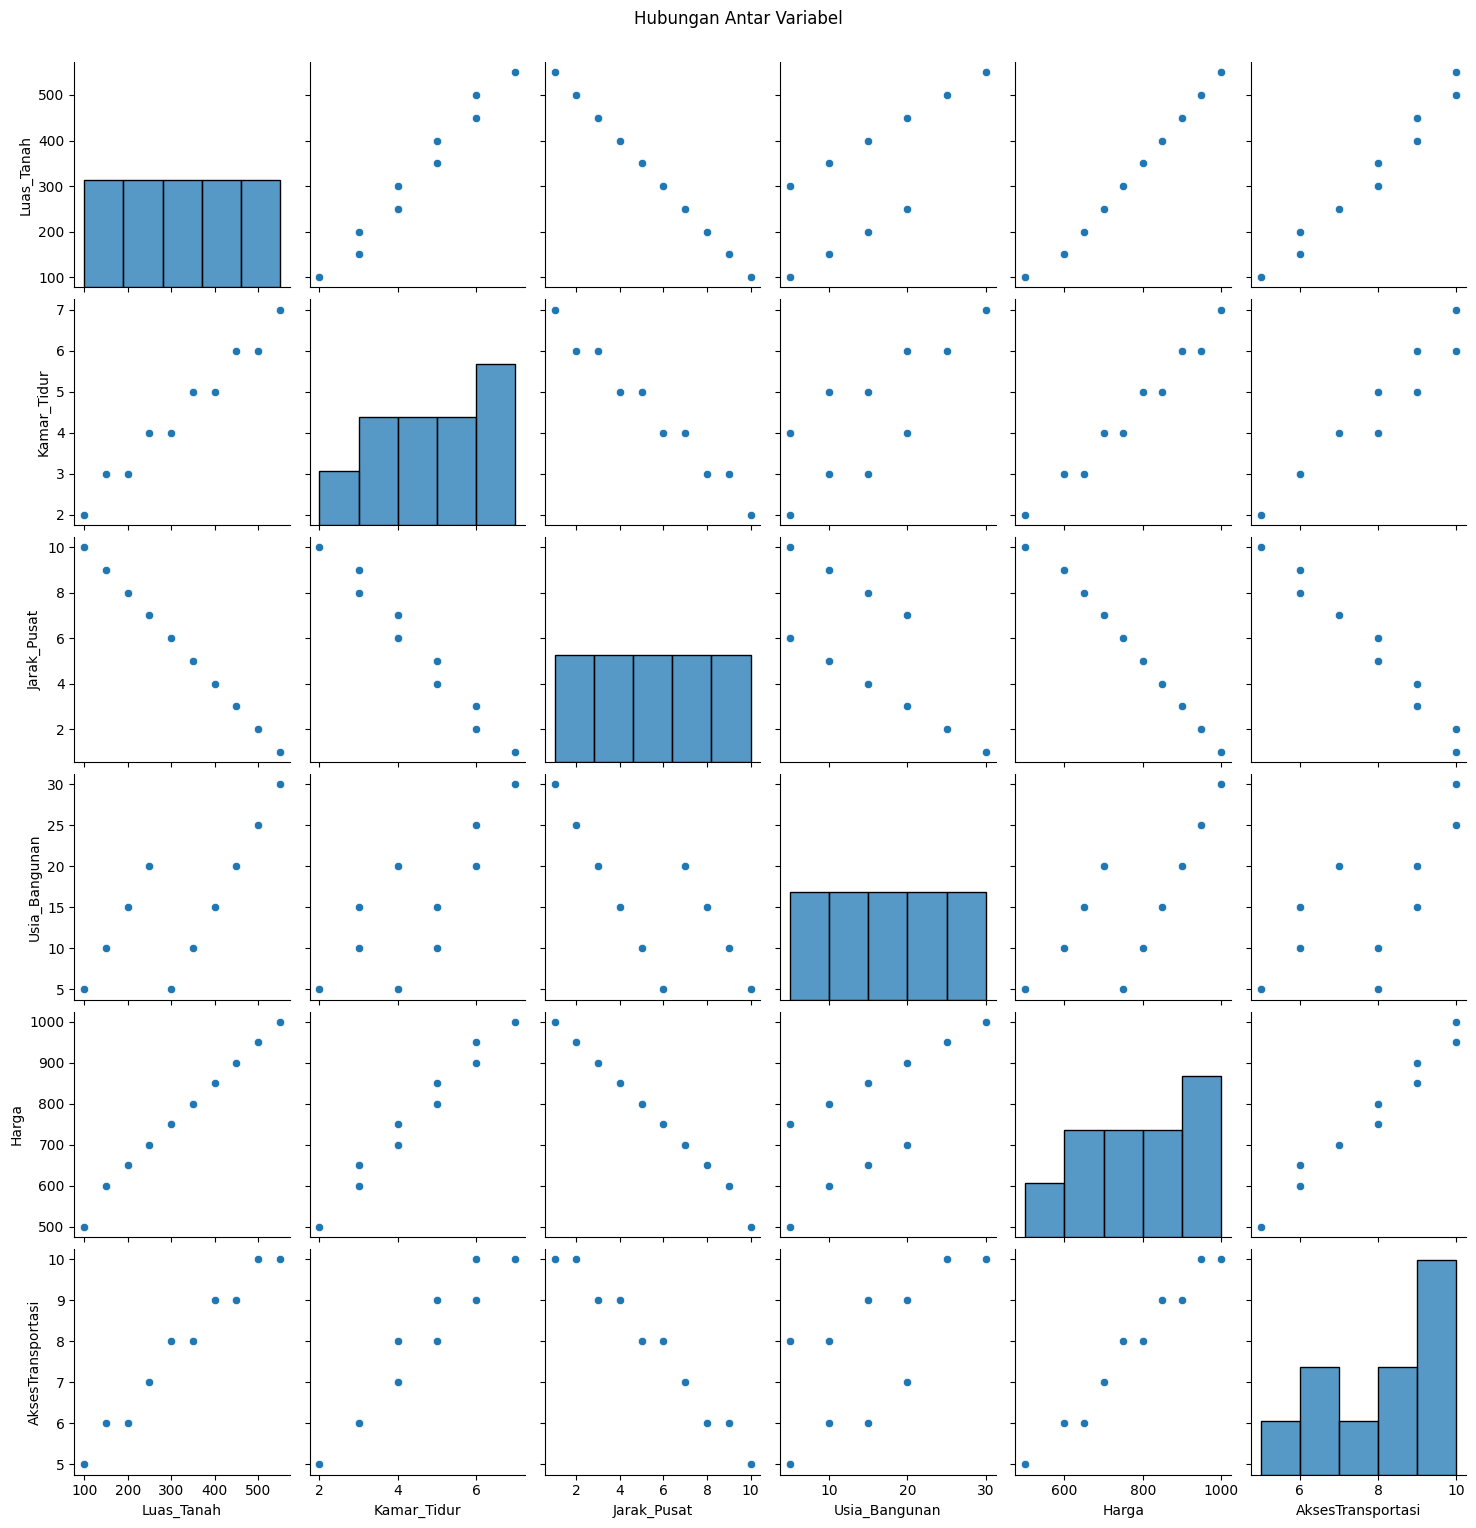

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro

# Dataset awal
data = {
    'Luas_Tanah': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550],
    'Kamar_Tidur': [2, 3, 3, 4, 4, 5, 5, 6, 6, 7],
    'Jarak_Pusat': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    'Usia_Bangunan': [5, 10, 15, 20, 5, 10, 15, 20, 25, 30],
    'Harga': [500, 600, 650, 700, 750, 800, 850, 900, 950, 1000],
    'AksesTransportasi': [5, 6, 6, 7, 8, 8, 9, 9, 10, 10]  # variabel tambahan
}
df = pd.DataFrame(data)

# Visualisasi awal
sns.pairplot(df)
plt.suptitle("Hubungan Antar Variabel", y=1.02)
plt.show()

X = df.drop(columns='Harga')
y = df['Harga']

X_const = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X_const, y, test_size=0.2, random_state=42)


In [ ]:
# Bangun model OLS
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Harga   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     133.9
Date:                Mon, 02 Jun 2025   Prob (F-statistic):            0.00108
Time:                        04:04:50   Log-Likelihood:                -28.080
No. Observations:                   7   AIC:                             64.16
Df Residuals:                       3   BIC:                             63.94
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
LuasTanah        1.9010      0.599      3.176   

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


RMSE: 10.622957319986053
R2 Score: 0.9963151927437635


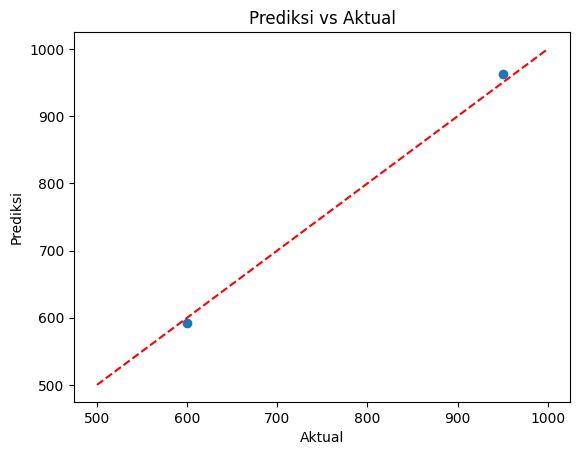

In [ ]:
# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

# Plot prediksi vs aktual
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.title("Prediksi vs Aktual")
plt.show()


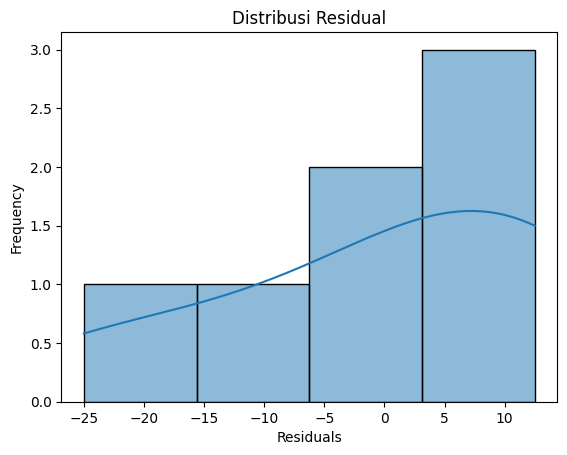

In [ ]:
residuals = model.resid
sns.histplot(residuals, kde=True)
plt.title("Distribusi Residual")
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

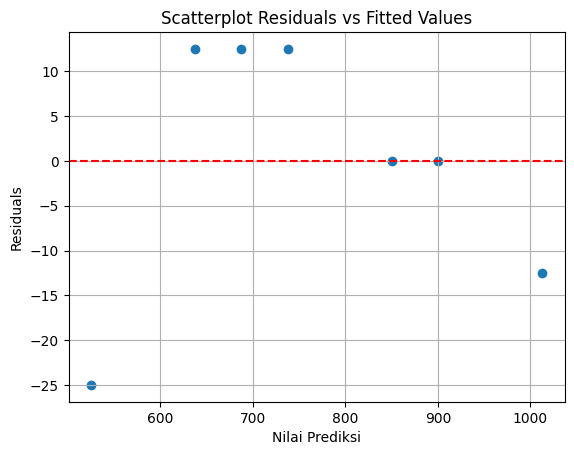

In [ ]:
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Scatterplot Residuals vs Fitted Values")
plt.xlabel("Nilai Prediksi")
plt.ylabel("Residuals")
plt.grid(True)

In [ ]:
# Hitung VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

             feature          VIF
0         Luas_Tanah  1316.262189
1        Kamar_Tidur    42.000000
2        Jarak_Pusat    93.055592
3      Usia_Bangunan     3.242188
4  AksesTransportasi    46.000000
